# Ensemble Model

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
train = pd.read_csv('/Users/sa12/Documents/Repositories/PredictPodcastListeningTime/PodcastData/clean_train.csv',index_col=[0])
test = pd.read_csv('/Users/sa12/Documents/Repositories/PredictPodcastListeningTime/PodcastData/clean_test.csv',index_col=[0])
train

,Episode_Length_minutes,Number_of_Ads,Listening_Time_minutes,Episode_Sentiment
211159,64.83,53.37,50.44892,1
283606,109.93,103.91,103.89696,0
436577,115.25,103.00,103.12686,0
495919,64.83,53.42,50.44892,0
537705,112.27,103.75,103.12686,0
567235,16.13,12.00,6.49000,1
602553,112.27,103.25,103.12686,0
672139,115.74,103.25,103.12686,0
683147,109.93,103.88,103.89696,0


In [22]:
# Create a 'X' and 'Y' training set, where 'X' is simply the dataframe without the 'Attrition' column
X = train.drop('Listening_Time_minutes', axis=1)

# and 'Y' is the 'Attrition' column
y = train['Listening_Time_minutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [24]:
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
regressor.fit(X_train, y_train)
score = regressor.score(X_train, y_train)
print("R-squared:", score)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
#mse = mean_squared_error(y_test, y_pred)
#print(f"Mean Squared Error: {mse:.4f}")

R-squared: 1.0
MSE:  644.1288825221333
RMSE:  25.379694295285223


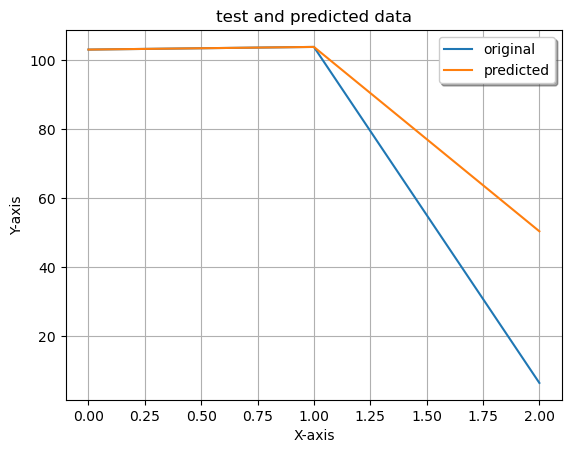

In [26]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [16]:
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid_pred = regressor.predict(X_grid)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_grid, y_grid_pred, color='blue', label='Model Prediction')
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

TypeError: arange() not supported for inputs with DType <class 'numpy.dtypes.StrDType'>.

IndexError: list index out of range

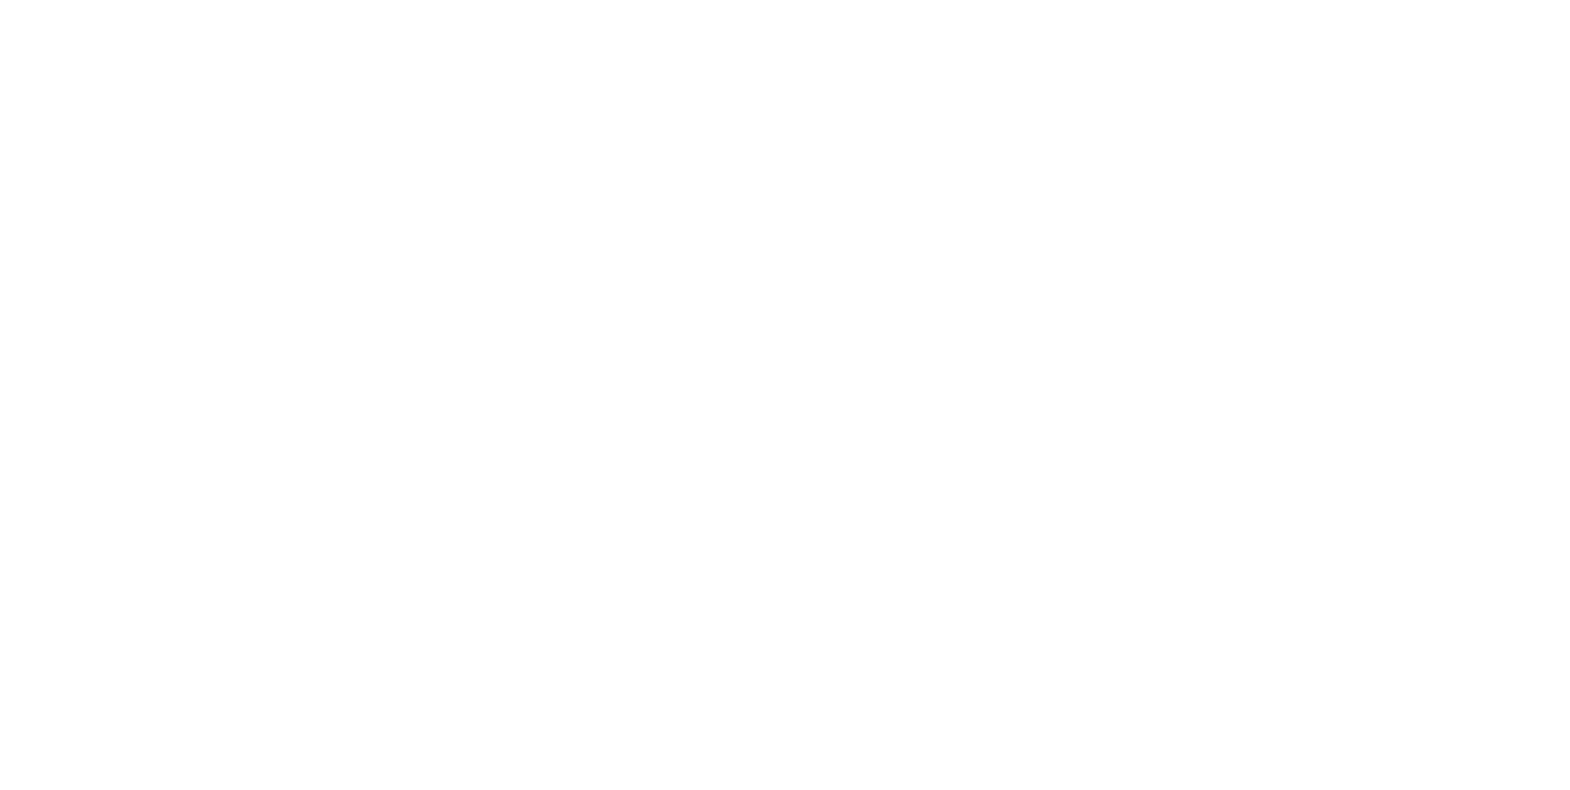

In [19]:
# Visualizing decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    regressor,
    feature_names=["Feature"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()